In [44]:
import config as cfg
import requests
import cv2
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
from pprint import pprint

BASE_URL = "https://api.radiomemory.com.br/ia-dev/api/v1"

def encode_image(image):

    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    image64 = base64.b64encode(buffered.getvalue())
    return image64.decode()

## API Docs
<https://api.radiomemory.com.br/ia/api/v1/docs>  
<https://api.radiomemory.com.br/ia/api/v1/redoc>

# Authentication

In [35]:
response = requests.post(
        BASE_URL + "/auth/token",
        data={
            "username": cfg.USERNAME,
            "password": cfg.PASSWORD,
        },
    )
token = response.json()["access_token"]
headers = {"Authorization": "Bearer %s" % token}

In [38]:
# The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
image = Image.open("images/panoramic0.jpg").convert("L")

# Panoramics

## Longaxis Endpoint

Returns a point coordinates for the crown and the root of every tooth in the panoramic image.

In [39]:
longaxis_response = requests.post(
        BASE_URL + "/panoramics/describe",
        json={
            "base64_image": encode_image(image),
        },
        headers=headers,
    )

### Output Sample

In [46]:
pprint(str(longaxis_response.json())[:1000])

("{'dentition': {'results': [{'class_name': 'normal', 'score': 1.0}, "
 "{'class_name': 'desdentado_superior', 'score': 7.882013930426979e-10}, "
 "{'class_name': 'mista', 'score': 2.5856181778971532e-11}, {'class_name': "
 "'desdentado_inferior', 'score': 1.471757177934352e-12}, {'class_name': "
 "'desdentado_total', 'score': 4.947066873719725e-19}]}, 'longaxis': {'width': "
 "2444, 'height': 1292, 'model_version': '0.1.0', 'keypoints': [{'x': "
 "632.8214285714287, 'y': 553.7142857142857, 'score': 0.5159812122583389, "
 "'class_name': '18_0'}, {'x': 611.0, 'y': 351.83928571428567, 'score': "
 "0.5159812122583389, 'class_name': '18_1'}, {'x': 752.8392857142858, 'y': "
 "594.0892857142857, 'score': 0.594242125749588, 'class_name': '17_0'}, {'x': "
 "687.375, 'y': 374.91071428571433, 'score': 0.594242125749588, 'class_name': "
 "'17_1'}, {'x': 861.9464285714287, 'y': 582.5535714285714, 'score': "
 "0.518118605017662, 'class_name': '16_0'}, {'x': 807.3928571428571, 'y': "
 "369.142857142

### Visualization

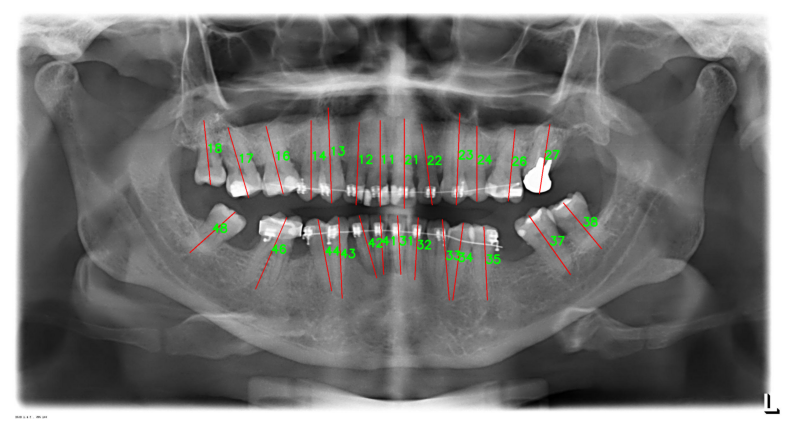

In [52]:
from vis import draw_longaxis_output

dimage = draw_longaxis_output(image, longaxis_response.json()["longaxis"]["keypoints"], draw_axis=True)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Panorogram Endpoint

Returns the panorogram curves of the panoramic image.

In [53]:
panorogram_response = requests.post(
        BASE_URL + "/panoramics/panorogram",
        json={
            "base64_image": encode_image(image),
        },
        headers=headers,
    )

### Output Sample

In [56]:
pprint(str(panorogram_response.json())[:1000])

("{'width': 2444, 'height': 1292, 'model_version': '0.1.0', 'contours': "
 "[{'class_name': 'ContMand', 'contours': [[{'x': 150.0, 'y': 179.0}, {'x': "
 "149.0, 'y': 180.0}, {'x': 148.0, 'y': 180.0}, {'x': 147.0, 'y': 180.0}, "
 "{'x': 146.0, 'y': 180.0}, {'x': 145.0, 'y': 180.0}, {'x': 144.0, 'y': "
 "180.0}, {'x': 143.0, 'y': 181.0}, {'x': 142.0, 'y': 181.0}, {'x': 141.0, "
 "'y': 181.0}, {'x': 140.0, 'y': 181.0}, {'x': 139.0, 'y': 182.0}, {'x': "
 "138.0, 'y': 182.0}, {'x': 137.0, 'y': 182.0}, {'x': 136.0, 'y': 183.0}, "
 "{'x': 135.0, 'y': 183.0}, {'x': 134.0, 'y': 184.0}, {'x': 133.0, 'y': "
 "184.0}, {'x': 132.0, 'y': 185.0}, {'x': 131.0, 'y': 185.0}, {'x': 130.0, "
 "'y': 186.0}, {'x': 129.0, 'y': 186.0}, {'x': 128.0, 'y': 187.0}, {'x': "
 "127.0, 'y': 188.0}, {'x': 126.0, 'y': 188.0}, {'x': 125.0, 'y': 189.0}, "
 "{'x': 124.0, 'y': 189.0}, {'x': 123.0, 'y': 190.0}, {'x': 122.0, 'y': "
 "191.0}, {'x': 121.0, 'y': 192.0}, {'x': 120.0, 'y': 193.0}, {'x': 119.0, "
 "'y': 194.0}, {'

### Visualization

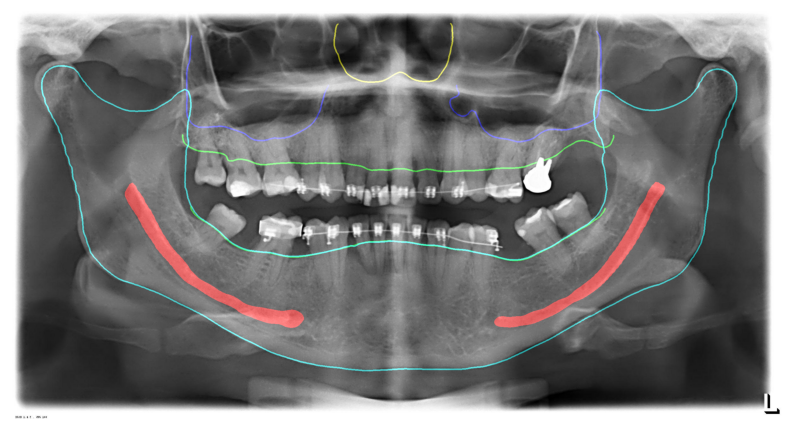

In [59]:
from vis import draw_panorogram
dimage = draw_panorogram(image, [[p["class_name"], [[c["x"], c["y"]] for c in p["contours"][0]]] for p in panorogram_response.json()["contours"]])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

## Metals Endpoint

Returns metal structures found on the panoramic image.

In [60]:
metals_response = requests.post(
        BASE_URL + "/panoramics/metals",
        json={
            "base64_image": encode_image(image),
        },
        headers=headers,
    )

### Sample Output

In [61]:
pprint(str(metals_response.json())[:1000])

("{'width': 2444, 'height': 1292, 'model_version': '0.1.0', 'bboxes': "
 "[{'class_name': 'ortodontia', 'score': 0.9597395062446594, 'x1': "
 "852.3056640625, 'y1': 622.955322265625, 'x2': 1568.8172607421875, 'y2': "
 "783.5983276367188}, {'class_name': 'ortodontia', 'score': "
 "0.8124524354934692, 'x1': 801.9857788085938, 'y1': 470.1335754394531, 'x2': "
 "1643.749267578125, 'y2': 635.50244140625}]}")


### Visualization

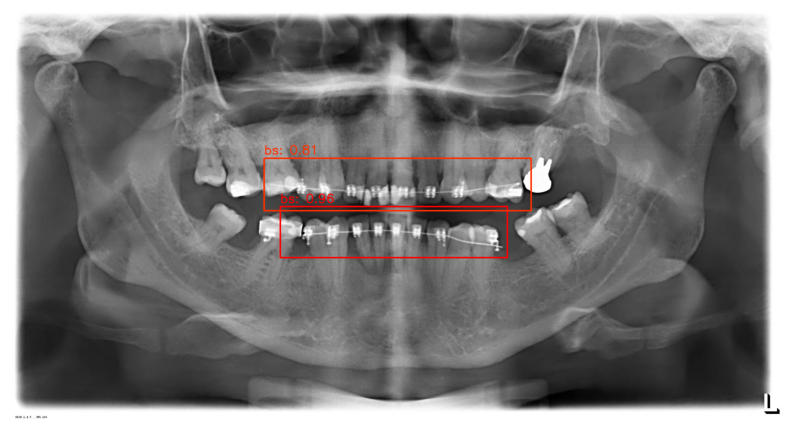

In [64]:
from vis import draw_bboxes

dimage = draw_bboxes(image, metals_response.json()["bboxes"])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

### Describe Endpoint

The describe endpoint will return the result of all models at once.  
The models can be called individually from the endpoints described in the docs.

In [23]:
image = Image.open("panoramic0.jpg").convert("L")  # The image is converted to grayscale in the backend, so you can convert it before sending in order to save bandwidth.
describe_response = requests.post(
        BASE_URL + "/panoramics/describe",
        json={
            "base64_image": encode_image(image),
        },
        headers=headers,
    )

FileNotFoundError: [Errno 2] No such file or directory: 'panoramic0.jpg'

In [ ]:
data = describe_response.json()
data.keys()

dict_keys(['dentition', 'longaxis', 'panorogram', 'metals', 'procedures', 'teeth_segmentation'])

#### Dentition

The dentition is a classification output that returns the class followed by its score in descendinf order.  
Choose the highest score output as the predicted class.

In [ ]:
data["dentition"]["results"]

[{'class_name': 'normal', 'score': 1.0},
 {'class_name': 'desdentado_superior', 'score': 7.882013930426979e-10},
 {'class_name': 'mista', 'score': 2.5856181778971532e-11},
 {'class_name': 'desdentado_inferior', 'score': 1.471757177934352e-12},
 {'class_name': 'desdentado_total', 'score': 4.947066873719725e-19}]

#### Longaxis

The longaxis network returns 32 poirs of points defining the longaxis of each teeth.  
Filter the points by score in order to eliminate missing teeth, a good threshold value is 0.14.

In [ ]:
str(data["longaxis"])[:1000]

"{'width': 2444, 'height': 1292, 'model_version': '0.1.0', 'keypoints': [{'x': 632.8214285714287, 'y': 553.7142857142857, 'score': 0.5159812122583389, 'class_name': '18_0'}, {'x': 611.0, 'y': 351.83928571428567, 'score': 0.5159812122583389, 'class_name': '18_1'}, {'x': 752.8392857142858, 'y': 594.0892857142857, 'score': 0.594242125749588, 'class_name': '17_0'}, {'x': 687.375, 'y': 374.91071428571433, 'score': 0.594242125749588, 'class_name': '17_1'}, {'x': 861.9464285714287, 'y': 582.5535714285714, 'score': 0.518118605017662, 'class_name': '16_0'}, {'x': 807.3928571428571, 'y': 369.1428571428571, 'score': 0.518118605017662, 'class_name': '16_1'}, {'x': 949.2321428571429, 'y': 594.0892857142857, 'score': 0.01081687060650438, 'class_name': '15_0'}, {'x': 1712.9821428571427, 'y': 363.375, 'score': 0.01081687060650438, 'class_name': '15_1'}, {'x': 949.2321428571429, 'y': 599.8571428571429, 'score': 0.3467762619256973, 'class_name': '14_0'}, {'x': 949.2321428571429, 'y': 351.83928571428567,

In [24]:
present_points = [keypoint for keypoint in data["longaxis"]["keypoints"] if keypoint["score"] > 0.14]
print(f"Numbe of present teeth: {len(present_points) // 2}")

Numbe of present teeth: 26


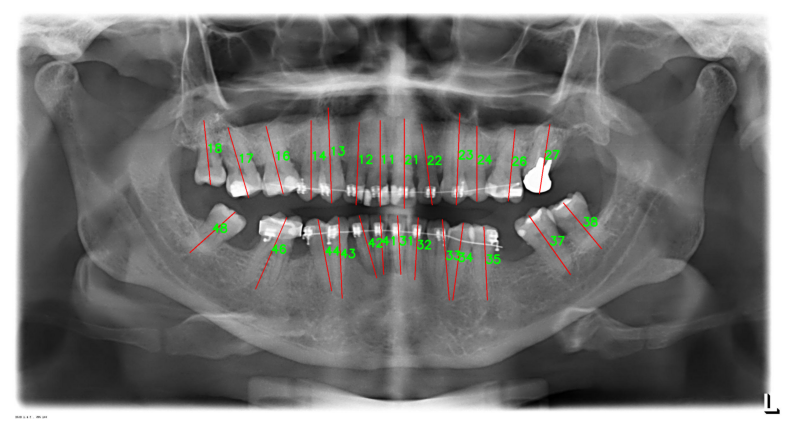

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

### Panorogram

The model returns each contour as a sequence of points

"{'width': 2444, 'height': 1292, 'model_version': '0.1.0', 'contours': [{'class_name': 'ContMand', 'contours': [[{'x': 150.0, 'y': 179.0}, {'x': 149.0, 'y': 180.0}, {'x': 148.0, 'y': 180.0}, {'x': 147.0, 'y': 180.0}, {'x': 146.0, 'y': 180.0}, {'x': 145.0, 'y': 180.0}, {'x': 144.0, 'y': 180.0}, {'x': 143.0, 'y': 181.0}, {'x': 142.0, 'y': 181.0}, {'x': 141.0, 'y': 181.0}, {'x': 140.0, 'y': 181.0}, {'x': 139.0, 'y': 182.0}, {'x': 138.0, 'y': 182.0}, {'x': 137.0, 'y': 182.0}, {'x': 136.0, 'y': 183.0}, {'x': 135.0, 'y': 183.0}, {'x': 134.0, 'y': 184.0}, {'x': 133.0, 'y': 184.0}, {'x': 132.0, 'y': 185.0}, {'x': 131.0, 'y': 185.0}, {'x': 130.0, 'y': 186.0}, {'x': 129.0, 'y': 186.0}, {'x': 128.0, 'y': 187.0}, {'x': 127.0, 'y': 188.0}, {'x': 126.0, 'y': 188.0}, {'x': 125.0, 'y': 189.0}, {'x': 124.0, 'y': 189.0}, {'x': 123.0, 'y': 190.0}, {'x': 122.0, 'y': 191.0}, {'x': 121.0, 'y': 192.0}, {'x': 120.0, 'y': 193.0}, {'x': 119.0, 'y': 194.0}, {'x': 118.0, 'y': 195.0}, {'x': 117.0, 'y': 196.0}, {'x

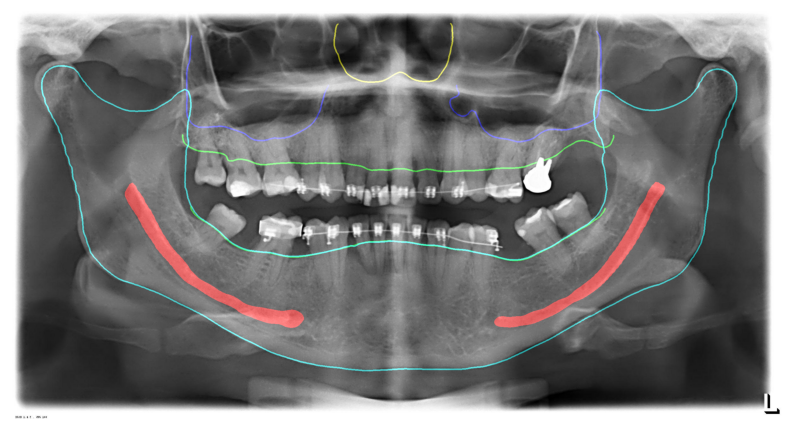

### Metals

The outputs consists of a list of bounding boxes for each structure found in the image.  
All bounding boxes candidates are returns, you should filter then by score, we recomend using 0.5.




In [29]:
data["metals"]

{'width': 2444,
 'height': 1292,
 'model_version': '0.1.0',
 'bboxes': [{'class_name': 'ortodontia',
   'score': 0.9597395062446594,
   'x1': 852.3056640625,
   'y1': 622.955322265625,
   'x2': 1568.8172607421875,
   'y2': 783.5983276367188},
  {'class_name': 'ortodontia',
   'score': 0.8124524354934692,
   'x1': 801.9857788085938,
   'y1': 470.1335754394531,
   'x2': 1643.749267578125,
   'y2': 635.50244140625}]}

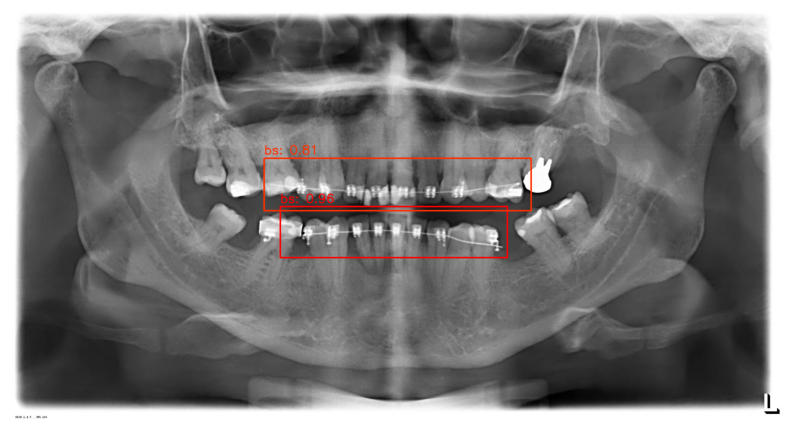

In [30]:
from vis import draw_bboxes
dimage = draw_bboxes(image, data["metals"]["bboxes"])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");

### Procedures

In [31]:
str(data["procedures"])[:1000]

"{'Anomalias': {'results': [{'class_name': 'MatRestCoron', 'score': 0.6624748706817627}, {'class_name': 'MatRestCoron', 'score': 0.006845148745924234}, {'class_name': 'Orto', 'score': 0.0009209007839672267}, {'class_name': 'Endo', 'score': 0.0006619721534661949}, {'class_name': 'RestProtMult', 'score': 0.0004611214098986238}, {'class_name': 'PinoIntra', 'score': 0.00028049296815879643}, {'class_name': 'OutrosProcs', 'score': 0.00012956174032296985}]}, 'Cirurgia': {'results': [{'class_name': 'MatRestCoron', 'score': 0.9759994745254517}, {'class_name': 'Orto', 'score': 0.0025386393535882235}, {'class_name': 'MatRestCoron', 'score': 0.0017635620897635818}, {'class_name': 'OutrosProcs', 'score': 0.001094084233045578}, {'class_name': 'RestProtMult', 'score': 0.0005835192860104144}, {'class_name': 'PinoIntra', 'score': 6.891608791192994e-05}, {'class_name': 'Endo', 'score': 1.63945496751694e-05}]}, 'Endodontia': {'results': [{'class_name': 'MatRestCoron', 'score': 0.8335766792297363}, {'clas

### Teeth Segmentation

The api returns an closed contour for each tooth. The contour is a list of points, each point is a dict of two values, the x and y coordinates.


In [32]:
str(data["teeth_segmentation"])[:1000]

"{'width': 2444, 'height': 1292, 'model_version': '0.1.0', 'contours': [{'class_name': '18', 'contours': [[{'x': 608.0, 'y': 355.0}, {'x': 607.0, 'y': 356.0}, {'x': 606.0, 'y': 356.0}, {'x': 605.0, 'y': 356.0}, {'x': 604.0, 'y': 357.0}, {'x': 603.0, 'y': 357.0}, {'x': 602.0, 'y': 358.0}, {'x': 601.0, 'y': 358.0}, {'x': 600.0, 'y': 358.0}, {'x': 599.0, 'y': 359.0}, {'x': 598.0, 'y': 360.0}, {'x': 597.0, 'y': 360.0}, {'x': 596.0, 'y': 361.0}, {'x': 595.0, 'y': 361.0}, {'x': 594.0, 'y': 362.0}, {'x': 593.0, 'y': 363.0}, {'x': 592.0, 'y': 364.0}, {'x': 591.0, 'y': 364.0}, {'x': 590.0, 'y': 365.0}, {'x': 590.0, 'y': 366.0}, {'x': 590.0, 'y': 367.0}, {'x': 589.0, 'y': 368.0}, {'x': 588.0, 'y': 368.0}, {'x': 587.0, 'y': 369.0}, {'x': 586.0, 'y': 370.0}, {'x': 585.0, 'y': 371.0}, {'x': 584.0, 'y': 372.0}, {'x': 583.0, 'y': 372.0}, {'x': 582.0, 'y': 373.0}, {'x': 582.0, 'y': 374.0}, {'x': 582.0, 'y': 375.0}, {'x': 582.0, 'y': 376.0}, {'x': 582.0, 'y': 377.0}, {'x': 582.0, 'y': 378.0}, {'x': 582

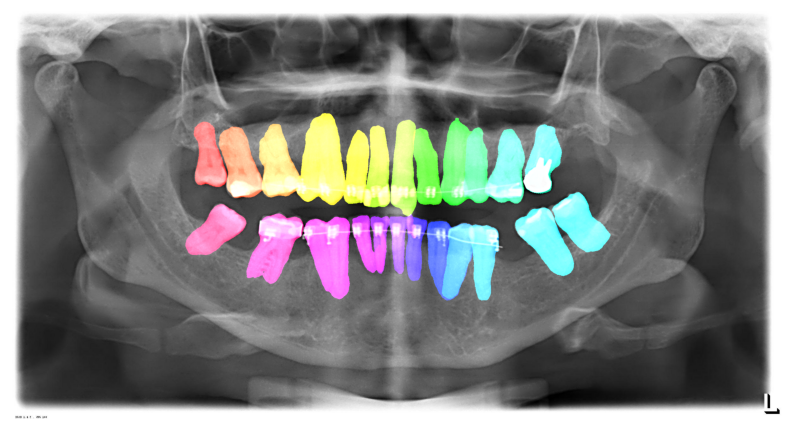

In [33]:
from vis import contour2mask, draw_masks
contours_list = [[[[c["x"], c["y"]] for c in cont] for cont in p["contours"]] for p in data["teeth_segmentation"]["contours"]]
masks = [contour2mask(contour, *image.size) for contour in contours_list]
dimage = draw_masks(image, masks)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dimage)
ax.axis("off");